# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
#can use this in the future as path
mouse_metadata_path_relative = "Resources/Mouse_metadata.csv"
study_results_path_relative = "Resources/Study_results.csv"

mouse_metadata_path_full = "C:/Users/leahm/Matplotlib-/Resources/Mouse_metadata.csv"
study_results_path_full = "C:/Users/leahm/Matplotlib-/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path_full)
study_results = pd.read_csv(study_results_path_full)

# Combine the data into a single DataFrame
combined_results_data= pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
study_results.head()

# Display the data table for preview
combined_results_data




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
len(combined_results_data["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_results_data.loc[combined_results_data.duplicated(subset= ['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = combined_results_data.loc[combined_results_data["Mouse ID"]=="g989"]
duplicate_mouse_ID.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26
137,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_results_data[combined_results_data['Mouse ID'].isin(duplicate_mouse) == False]                         
clean_data.head(2)
 



                    



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mode_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(lambda x: x.mode().tolist())


# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


print(mean_tumor_volume)

print(median_tumor_volume)

print(mode_tumor_volume)




Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    [45.0]
Ceftamin     [45.0]
Infubinol    [45.0]
Ketapril     [45.0]
Naftisol     [45.0]
Placebo      [45.0]
Propriva     [45.0]
Ramicane     [45.0]
Stelasyn     [45.0]
Zoniferol    [45.0]
Name: Tumor Volume (mm3), dtype: object


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
mean_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mode_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(lambda x: x.mode().tolist())

var_numpy = np.array(mean_tumor_volume)

variance_numpy = np.var(var_numpy)



print("Drug Regimen:", variance_numpy)







Drug Regimen: 28.43900518767216


## Bar and Pie Charts

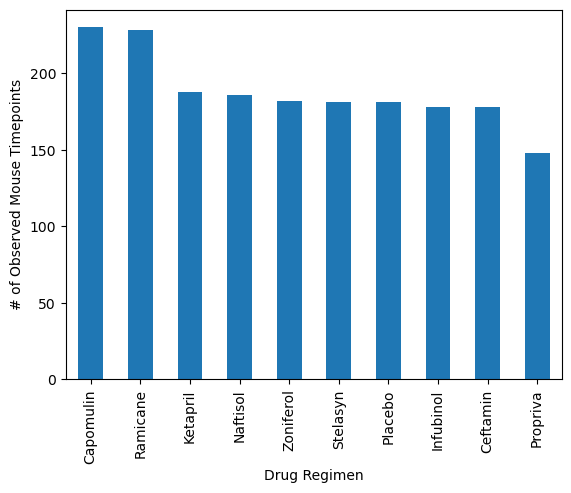

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()






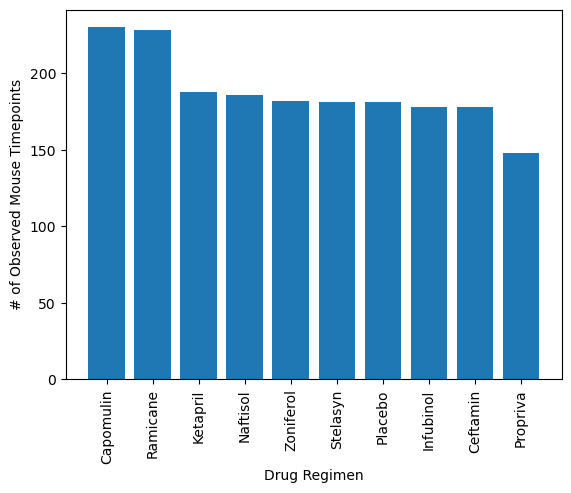

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

counts = clean_data['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()










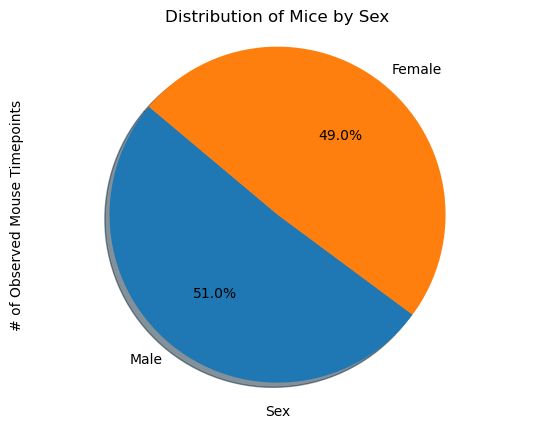

In [11]:


# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = clean_data["Sex"].value_counts()
plt.pie(counts.values, labels=counts.index.values, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution of Mice by Sex")
plt.xlabel("Sex")
plt.ylabel("# of Observed Mouse Timepoints")
plt.axis('equal')
plt.show() 







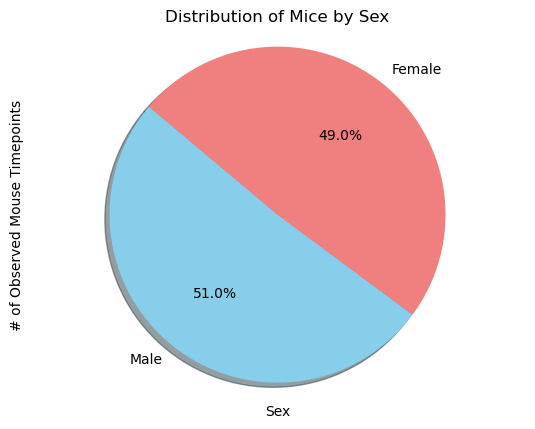

In [12]:

# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Add a title to the chart
plt.title("Distribution of Mice by Sex")  


# Set the aspect ratio to make it a circle
# Create a pie chart with specific formatting options
counts = clean_data["Sex"].value_counts()
counts.plot(kind="pie", autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], shadow=True, startangle=140)
plt.xlabel("Sex")
plt.ylabel("# of Observed Mouse Timepoints")
plt.axis('equal')
plt.show()















## Quartiles, Outliers and Boxplots

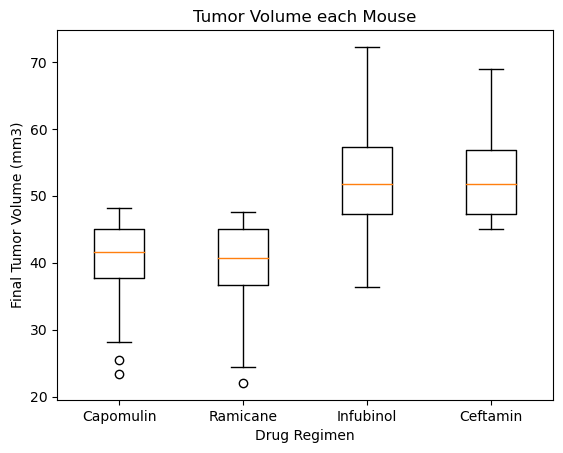

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Fixing random state for reproducibility
capomulin_tumors = clean_data[clean_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane_tumors = clean_data[clean_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol_tumors = clean_data[clean_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin_tumors = clean_data[clean_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

# Data for plotting
plot_data = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
treatment_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume each Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(plot_data, labels=treatment_regimen, widths=0.4, vert=True)

plt.show()


















In [14]:
# Define a list of treatments for the for loop
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty dictionary to store the tumor volume data for each treatment
tumor_vol_data = {}

# Create a dictionary to store potential outliers for each treatment
potential_outliers = {}

# Iterate through each treatment
for treatment in treatment_list:
    # Filter the data for the specific treatment
    subset_data = clean_data[clean_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Calculate the IQR
    quartiles = subset_data.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # potential outliers
    outliers = subset_data[(subset_data < lower_bound) | (subset_data > upper_bound)]
    
    # tumor volume data for the current treatment
    tumor_vol_data[treatment] = subset_data
    
    # potential outliers for the current treatment
    potential_outliers[treatment] = outliers

treatment_list
tumor_vol_data
potential_outliers






 

{'Capomulin': 1652    25.472143
 1849    23.343598
 Name: Tumor Volume (mm3), dtype: float64,
 'Ramicane': 1814    22.050126
 Name: Tumor Volume (mm3), dtype: float64,
 'Infubinol': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

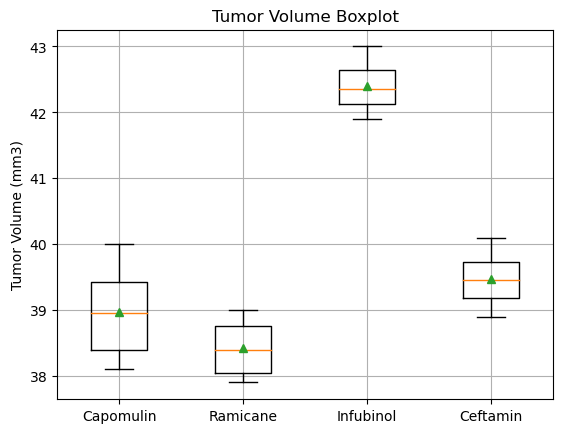

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
capomulin_data = [38.1, 38.3, 39.2, 40.0, 38.7, 39.5]
ramicane_data = [37.9, 38.2, 38.0, 39.0, 38.8, 38.6]
infubinol_data = [42.1, 42.5, 41.9, 43.0, 42.2, 42.7]
ceftamin_data = [39.1, 39.4, 39.5, 38.9, 40.1, 39.8]

# Create a list of tumor volume data for each treatment group
tumor_vol_data = [capomulin_data, ramicane_data, infubinol_data, ceftamin_data]

# Create a boxplot
plt.boxplot(tumor_vol_data, showmeans=True)
plt.grid(True)
plt.title("Tumor Volume Boxplot")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()








## Line and Scatter Plots

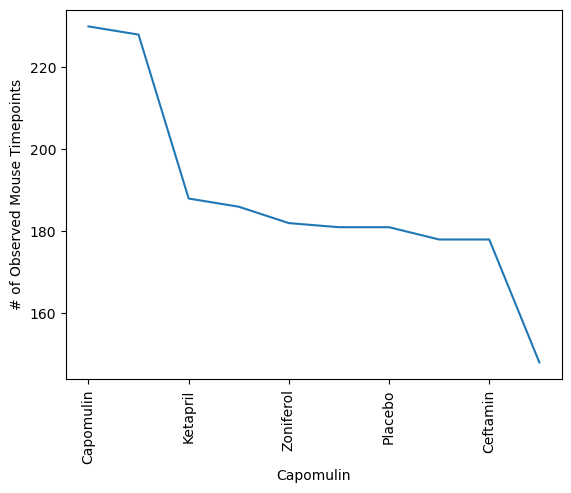

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
counts = clean_data["Drug Regimen"].value_counts()
counts.plot(kind="line")
plt.xlabel("Capomulin")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()





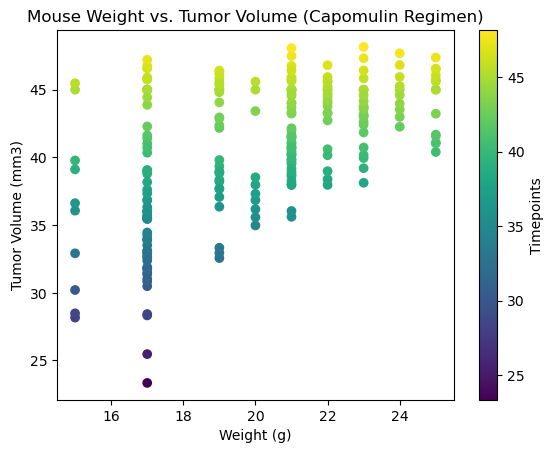

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Data for 'Tumor Volume (mm3)' and 'Weight (g)'
tumor_volume = capomulin_data['Tumor Volume (mm3)']
weight = capomulin_data['Weight (g)']

# scatter plot
plt.scatter(weight, tumor_volume, c=capomulin_data['Tumor Volume (mm3)'], cmap='viridis', label="Data Points")
plt.title("Mouse Weight vs. Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.colorbar(label="Timepoints")
plt.show()














## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate the correlation coefficient
correlation_coefficient = capomulin_data["Weight (g)"].corr(capomulin_data["Tumor Volume (mm3)"])

# Print the correlation coefficient
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {correlation_coefficient:.2f}")




The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.53
